# ASTR 596 Computer lab - Characterizing CCDs (50 points)

In this lab you will learn how to:
* read in a CCD image into python
* learn how to display a CCD image
* measure properties of that CCD image
* from a set of CCD Bias frames and Flat field frames, determine the readnoise and gain of the CCD

<i>Note: Enter in all code to the problems in the provided notebook cells. Questions to answer will be <b>bolded</b>.</i>  

All your answers should be entered in this notebook. Each student will need to hand in their own notebook by uploading it to GitHub following the instructions.

In the code places where you will need to put something or write your own code are specified by `#***************`  You will not get points for doing this unless explicitly noted.  Some of these things are just to make sure you are setting up your paths correctly.

**Due on Nov. 3 at Noon** to be handed into the "Characterizing CCDs" assignment in Module 6.

### Import modules

In [2]:
import os
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import scoreatpercentile
import glob
%matplotlib inline
from astropy.nddata import CCDData
import astropy.units as u
from ccdproc import ImageFileCollection, Combiner, combine
from ccdproc import wcs_project

### Define a function for displaying images

* We will want to look at images as we examine and analyze the data, so here will will define a function for displaying images. 
* This will handle getting the stretch of the image correct. 
* Feel free to play with the settings and colormap once you get the hang of the process.



In [3]:
def imdisplay(image, v1perc=10, v2perc=95):
    '''
    display an image 
    OPTIONAL KEYWORD PARAMETERS
    v1perc: one end of the colormap assigned to the v1perc percent lowest flux 
    v2perc: the other end of the colormap assigned to the v2perc percent highest flux    
    '''
    # make sure image is an np array
    nimage = np.array(image)
    # determine the pixel values at the 10th and 95th percentile
    v1 = scoreatpercentile(nimage,v1perc)
    v2 = scoreatpercentile(nimage,v2perc)
    # display using imshow
    #
    # you can play with alternate cmaps in the function below, such as "viridis" or "gray"
    # The 'gray_r' color map reverses the color-scale so that dark display pixels are the brightest in the image
    #
    # vmin and vmax set the min and max pixel values that
    # will be mapped to the extremes of the colormap
    plt.imshow(nimage,cmap='gray_r',vmin=v1,vmax=v2)
    plt.colorbar(fraction=.08)

### Display raw science image

Text(0.5, 1.0, 'V-band Raw image')

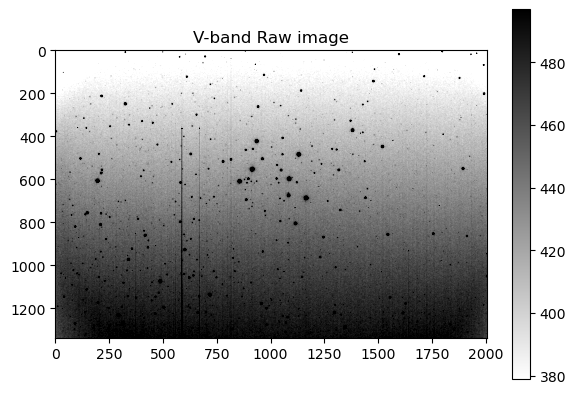

In [4]:
plt.figure()
data_vimraw, header_vimraw = fits.getdata('M29-0005g.fit',header=True)
imdisplay(data_vimraw)
plt.title("V-band Raw image")

### Display processed science image

Text(0.5, 1.0, 'V-band Processed image')

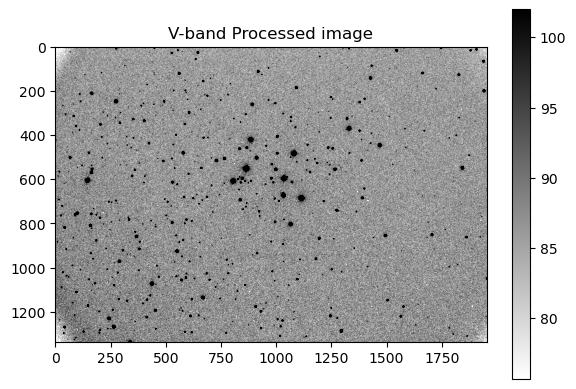

In [12]:
plt.figure()
data_vimproc, header_vimproc = fits.getdata('cazfdp-M29-0005g.fits',header=True)
imdisplay(data_vimproc)
plt.title("V-band Processed image")

## Problem 1 (5 points)

The two images above are the same exact image except that one is raw and one has been fully processed.  In the cell below, describe the origin of the differences between the two images.  I want you to be precise.  NOTE: This CCD has no overscan region so we only have the combined bias frames.  Also pay attention to the values in the colorbar.

answer goes here: Background noise, dark current, entire columns of pixels giving bad data, an incorrect gradient of color, possible oversaturation from the bright stars, which leads to the dimmer ones getting drowned out

### Display two flat field images

Text(0.5, 1.0, 'B-band Sky Flat')

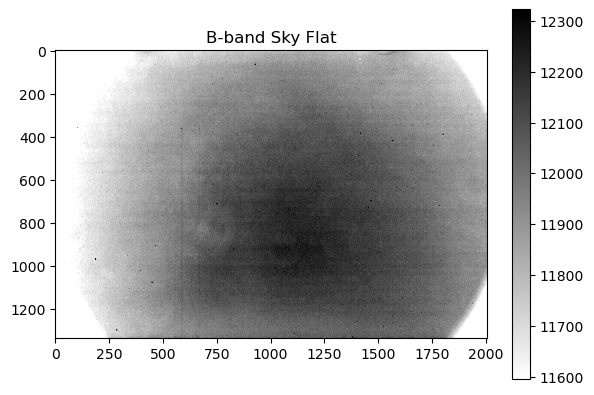

In [6]:
plt.figure()
data_flatb, header_flatb = fits.getdata('skyflat-0001b.fit',header=True)
imdisplay(data_flatb,v2perc=99)
plt.title("B-band Sky Flat")

Text(0.5, 1.0, 'V-band Sky Flat')

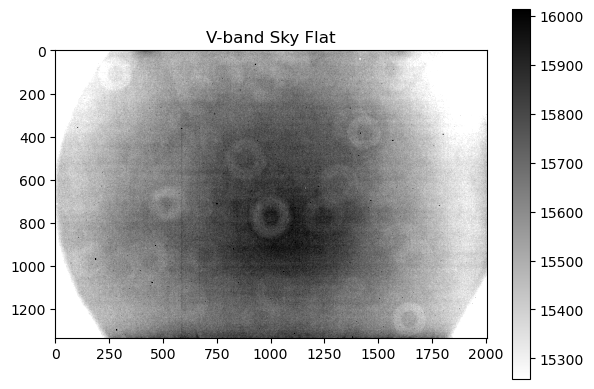

In [7]:
plt.figure()
data_flatv, header_flatv = fits.getdata('skyflat-0001v.fit',header=True)
imdisplay(data_flatv,v2perc=99)
plt.title("V-band Sky Flat")

## Problem 2 (5 points)
The two images above are two different flat field images.  The total number of counts depends on the brightness of the sky in the filter you are using at the time of observation.  Aside from a difference in the total counts, describe what the origins could be of the differences in the flatfields.  Pay attention to differences both at the large scale and the short scale.  

It is not required for the problem, but if you would like to better understand the differences between the two images, you can write a short bit of code that divides the two data arrays and then displays them.

answer goes here: Different wavelengths of light are affected differently by the atmosphere which could cause a difference in the total counts, as well the different wavelengths bouncing in the telescope differently (which could potentially cause the donuts).

### Display or manipiulate a section of an image

You can feed sections of images to functions and they will either perform the necessary operations, or in the following case, display only those sections.  You may find it useful to consult the first python notebook we did, which had instructions on how to slice arrays.

## Problem 3 (5 points) - properly display a region of the image

You will need to complete the section of code below to display rows 400-900 and columns 750-1250.  You must compare the cutout to the full image above to make sure you are properly addressing rows and columns.

Text(0.5, 1.0, 'cutout of V-band image')

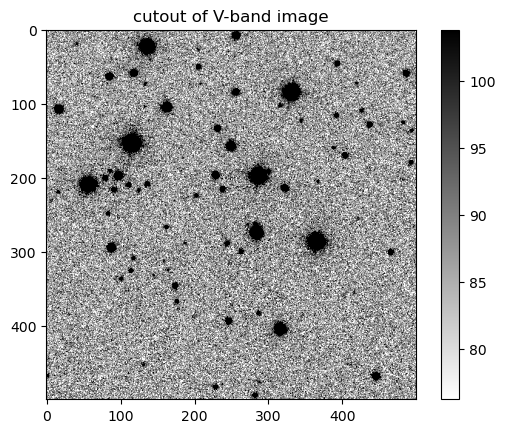

In [10]:
#to display only a section of an image you can perform the following operation
#this displays the section of the image
#***************** fill in the missing array range.
imdisplay(data_vimproc[399:899, 749:1249])
plt.title("cutout of V-band image")
#NOTE: that it renumbers the pixels and does *not* refer back to the original image.  
#It also bases the colorbar stretch on the pixels in the subsection that you are displaying

#### Compute statistics on an image
You can pass an image to numpy and compute statistics on it.  In the example below, I show how to compute the standard deviation of all pixel values of a bias image.

I have included two bias images in this directly, numbers 20 and 21


the standard deviation of the Bias frame is 42.081744983055124


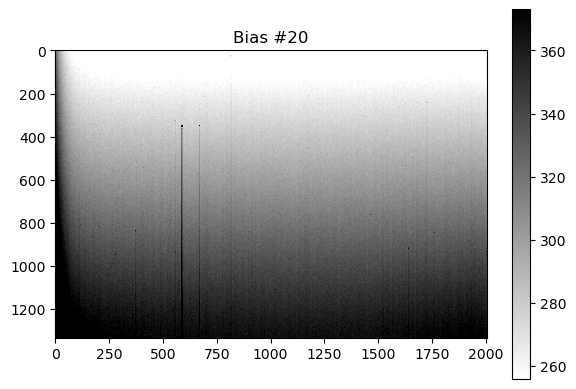

In [11]:
#first read in a bias image
plt.figure()
data_bias1, header_bias1 = fits.getdata('bias-0020.fit',header=True)
imdisplay(data_bias1)
plt.title("Bias #20")

print("the standard deviation of the Bias frame is", np.std(data_bias1))

## Problem 4 (5 points) - Compute the standard deviation of a subsection of the bias image
I would like you to write a peice of well-commented code that
1. displays the bias image extending over rows 600-800 and columns 1000-1200.
2. Measure the standard deviation of the pixels in this section of the bias and print it out.

Then I would like you to explain any differences in the standard deviation between this subsection and that of the full image.


the standard deviation of the Bias frame subsection is 12.980392044926841


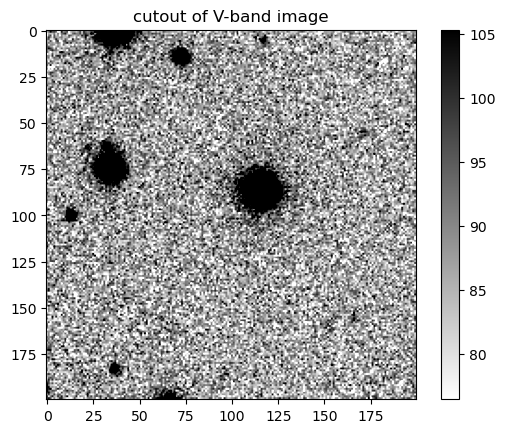

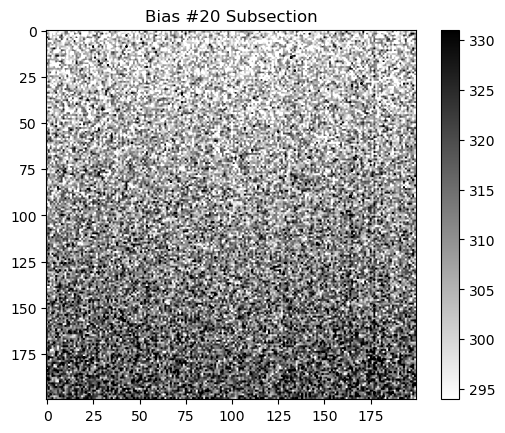

In [25]:
#Put your code here
#***********************
imdisplay(data_vimproc[599:799, 999:1199]) #displaying only that area of the image
plt.title("cutout of V-band image")

plt.figure()
data_bias1, header_bias1 = fits.getdata('bias-0020.fit',header=True) #calling the fits file to get the image information
imdisplay(data_bias1[599:799, 999:1199]) #displaying the image data from the fits file only for the subsection
plt.title("Bias #20 Subsection")

print("the standard deviation of the Bias frame subsection is", np.std(data_bias1[599:799, 999:1199]))  #finding standard deviation the image data from the fits
                                                                                                        #file only for the subsection

put your answer here: The deviation from any given point for a pixel is going to vary widely across the full image. Due to certain issues problems, some sections of the image may be widely off while others are only paritally off. When you take the standard deviation, it takes into account the full image, where certain sections could vary widely. For our smaller subsection, it seems to have less variation in its pixels, so its standard deviation is much smaller.

## Problem 5 (15 points) - compute the readnoise from two bias frames
Using the coding tools we described above and have used in the class, I would like you to 
1. write a well-commented program that measures the READNOISE using two bias frames and prints it out.  The name of the second bias frame is `bias-0021.fit`, which I have written code to read in. You cannot just use the answer from the question above, which was derived from one bias frame.
2. Describe why you can't jsut use one bias frame.
3. Comment on whether the number you derived is in electrons or ADU and justify your answer.

In [ ]:
#read in the other bias image
data_bias2,header_bias2 = fits.getdata("bias-0021.fit",header=True)

#convert both arrays to floating point arrays.  This is needed to make sure that
#arithmetic operations will work as the images are otherwise positive definite (UNSIGNED) integers.
data_bias1 = np.array(data_bias1,"f")
data_bias2 = np.array(data_bias2,"f")

#*******************
#Your code here


print("Readnoise of Bias Frame in ADU is = ", )

put answer to part 2 and 3 here:

## Problem 6 (15 points) - Compute gain of detector using flat field
1. Using your answer to Problem 5 and statistics of the B-band flat field image above, you will need to write a program that computes the gain of the CCD and prints it out.  Specify the units of the gain.  This will work for any flat-field image, but I just used the B-band (`data_flatb`) so that everyone is on the same page.

2. Include a text field with your mathematical derivation in LaTeX, which you can included in the text field.

3. Check your answer against the value in the header.  You can bring this value using `print(header_flatb['EGAIN'])`, where EGAIN is the header keyword for the gain.  Compute how accurate your estimate is.

**HINT:** You will need to think about the measured standard deviation of the pixel values in a section of the flatfield that is relatively uniform.  You can use that, and your knowledge of Poisson statistics and the way the gain affects the counts, to compute the gain.

In [ ]:
#*********** 
#your code goes here


print("gain = ", )
print("gain from header keyword = ", )
print("percentage differece = ", )